__Setup and Data Loading__


1)Air Quality Dataset: This dataset contains combined air quality data for Beijing, stored in the 'combined_data' table within the 'BeijingAirQuality' database.


2)Inorganic Gases Dataset: This dataset includes data on various inorganic gases from the year 2017, stored in the 'data_2017' table within the 'InorganicGases' database.

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy import create_engine, inspect
import numpy as np


In [11]:
# Function to load data from SQLite database
def load_data_from_sqlite(db_name, table_name):
    db_path = f'../data/{db_name}.db'
    engine = create_engine(f'sqlite:///{db_path}')
    
    # List tables to ensure the table names are correct
    inspector = inspect(engine)
    available_tables = inspector.get_table_names()
    print("Available tables in the database:", available_tables)
    
    if table_name not in available_tables:
        raise ValueError(f"Table {table_name} not found in the database.")
    
    # Load data from the specified table
    df = pd.read_sql_table(table_name, con=engine)
    return df


try:
    air_quality_df = load_data_from_sqlite('BeijingAirQuality', 'combined_data')
    print("Air Quality Data Loaded Successfully")
except Exception as e:
    print(f"Error loading air quality data: {e}")

try:
    inorganic_gases_df = load_data_from_sqlite('InorganicGases', 'data_2017')
    print("Inorganic Gases Data Loaded Successfully")
except Exception as e:
    print(f"Error loading inorganic gases data: {e}")

# Continue with EDA if the data is loaded successfully
if 'air_quality_df' in locals():
    print("\nAir Quality Dataset:")
    print(air_quality_df.head())

if 'inorganic_gases_df' in locals():
    print("\nInorganic Gases Dataset:")
    print(inorganic_gases_df.head())




Available tables in the database: ['combined_data']
Air Quality Data Loaded Successfully
Available tables in the database: ['data_2017']
Inorganic Gases Data Loaded Successfully

Air Quality Dataset:
         No     PM2.5      PM10       SO2       NO2        CO        O3  \
0 -1.793173 -0.828800 -0.870807 -0.170600 -1.299696 -0.112293  0.063893   
1 -1.793073 -0.803848 -0.892694 -0.076730 -1.071530 -0.025874 -0.094812   
2 -1.792973 -0.791372 -0.837977  0.017140 -0.900405 -0.025874 -0.218249   
3 -1.792873 -0.791372 -0.837977 -0.076730 -0.871884 -0.112293 -0.235883   
4 -1.792773 -0.816324 -0.947410  0.392619 -0.215905  0.146100 -0.570926   

       TEMP      PRES      DEWP      RAIN   wd      WSPM  station  \
0 -1.043179  1.558164 -1.508667 -0.078929  ESE  0.130499  Gucheng   
1 -1.095694  1.653836 -1.436195 -0.078929  SSE -0.836345  Gucheng   
2 -1.069437  1.682538 -1.450689 -0.078929    E -0.594634  Gucheng   
3 -1.165714  1.701672 -1.450689 -0.078929  ESE -0.514063  Gucheng   
4 -1

__Data Cleaning__

Check for and handle missing values, ensure datetime columns are properly formatted, and confirm that data cleaning is completed.


In [12]:

# Check for and handle missing values
air_quality_df.dropna(inplace=True)
inorganic_gases_df.dropna(inplace=True)

# Ensure datetime columns are properly formatted
air_quality_df['datetime'] = pd.to_datetime(air_quality_df['datetime'])
inorganic_gases_df['DateTime'] = pd.to_datetime(inorganic_gases_df['DateTime'])

print("Data cleaning completed.")


Data cleaning completed.


### Plotting Distributions of Pollutants

The following code plots the distributions of NO2, O3, and SO2 concentrations for both the Beijing air quality dataset and the European inorganic gases dataset. Each pollutant is visualized using histograms with KDE (Kernel Density Estimate) overlays for better understanding of the data distribution.


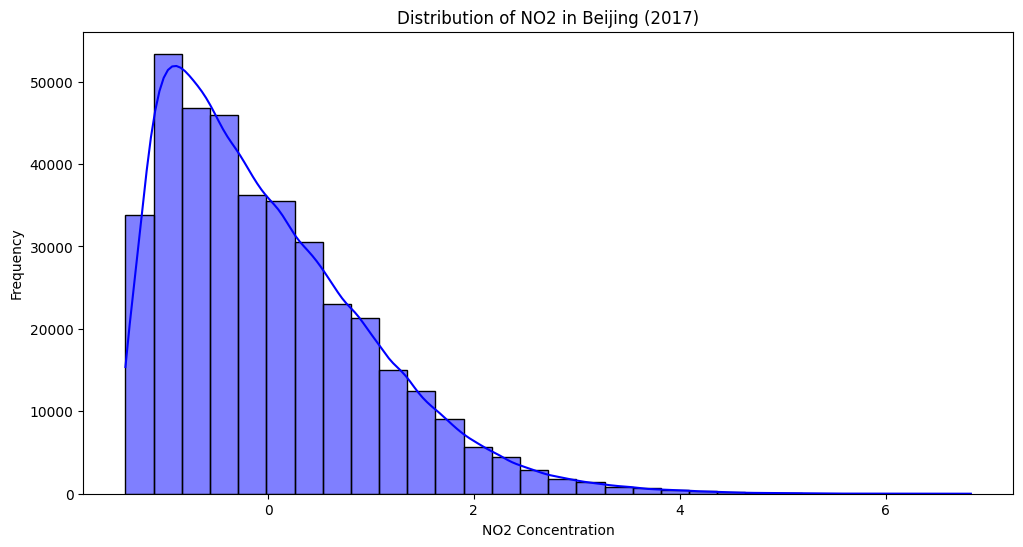

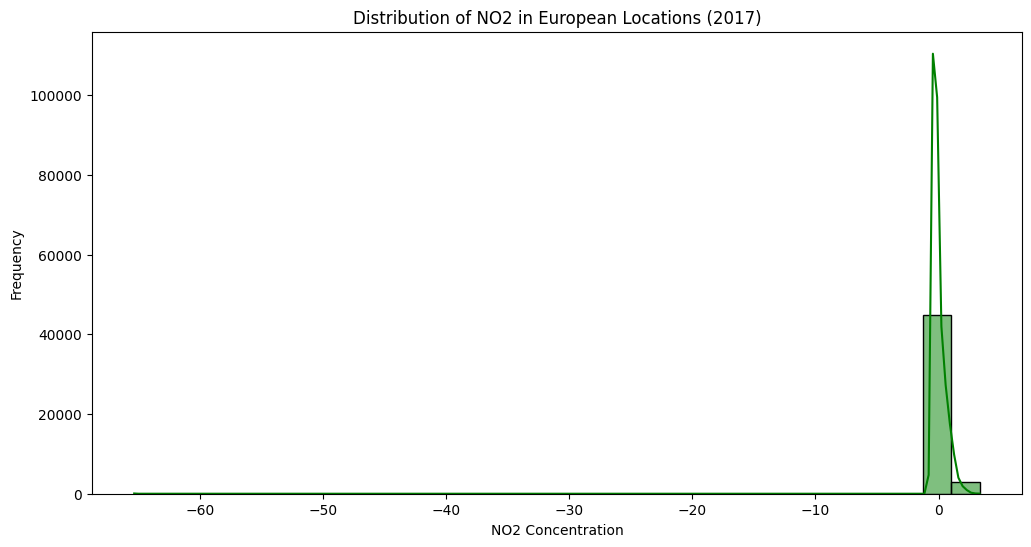

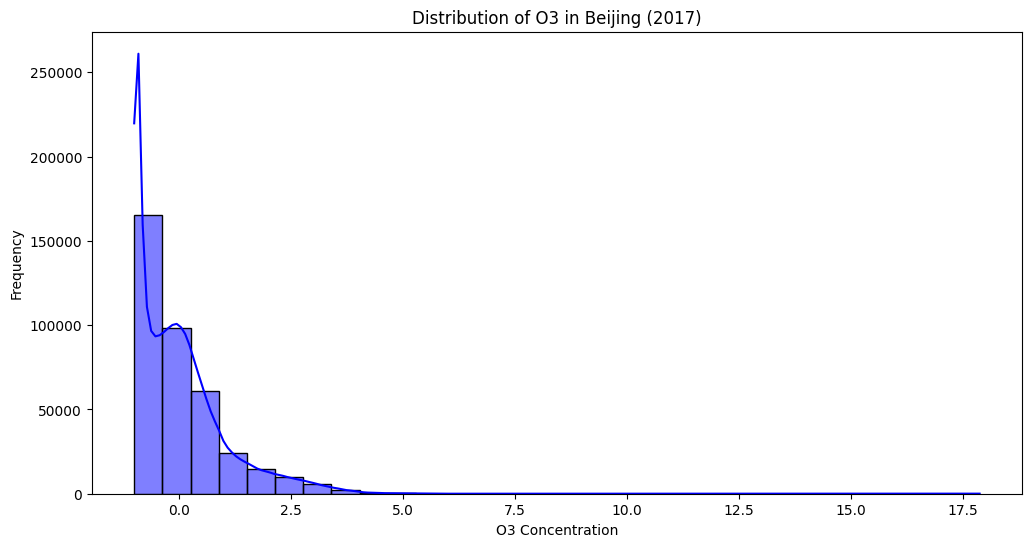

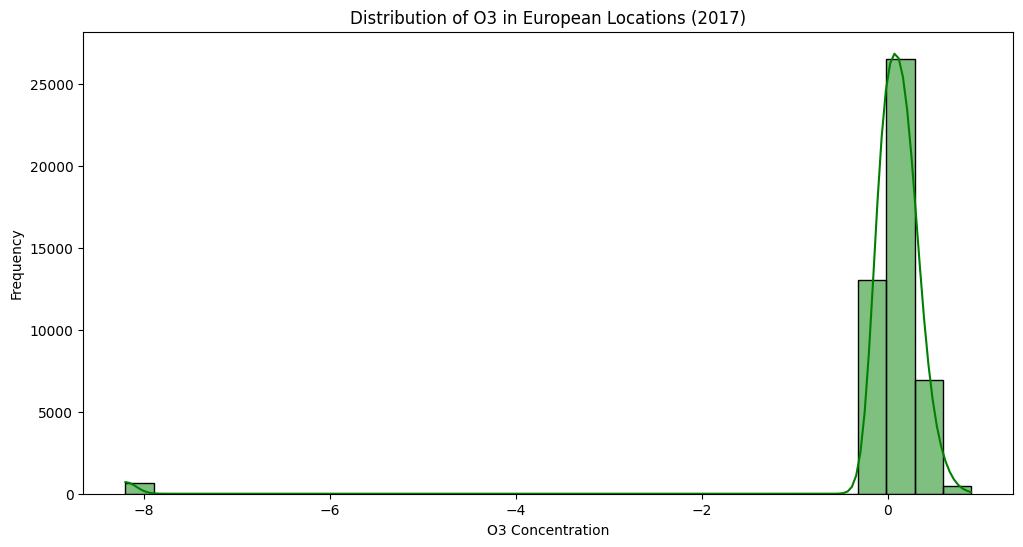

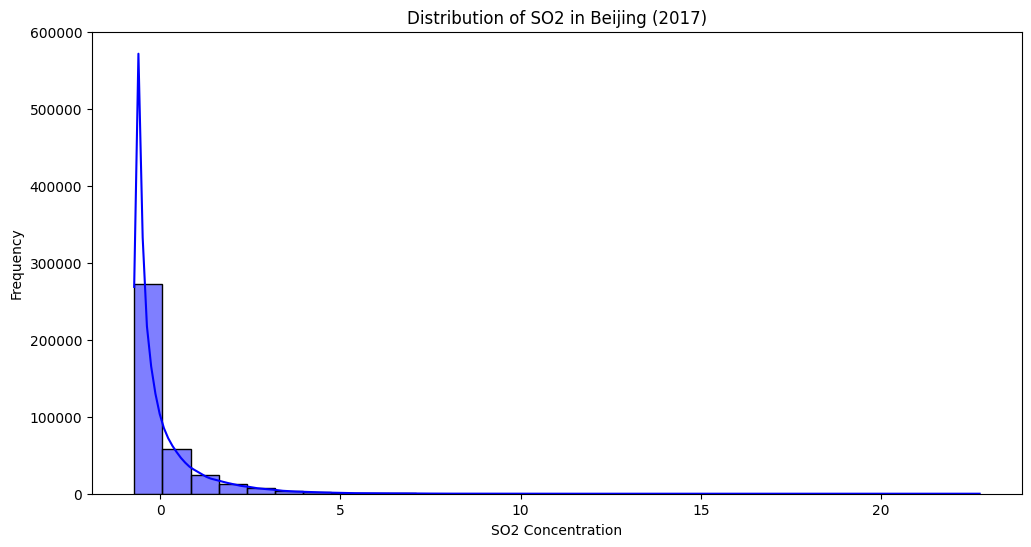

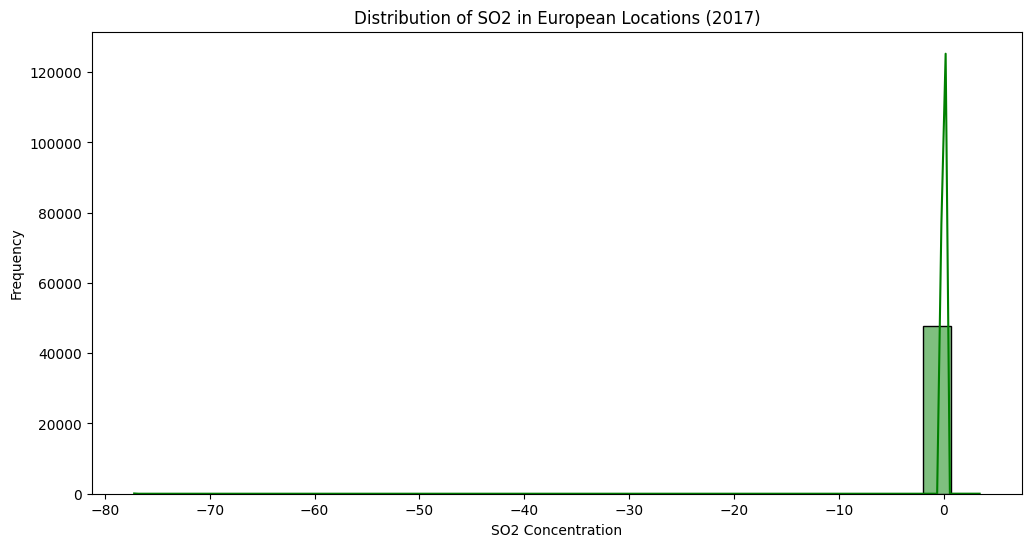

In [17]:
# Plot distributions of NO2, O3, and SO2
pollutants = ['NO2', 'O3', 'SO2']

for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    sns.histplot(air_quality_df[pollutant], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {pollutant} in Beijing (2017)')
    plt.xlabel(f'{pollutant} Concentration')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(inorganic_gases_df[pollutant], bins=30, kde=True, color='green')
    plt.title(f'Distribution of {pollutant} in European Locations (2017)')
    plt.xlabel(f'{pollutant} Concentration')
    plt.ylabel('Frequency')
    plt.show()

### Correlation Analysis of Air Quality Data

The following code performs a correlation analysis on the air quality data for both Beijing and various European locations. The correlation matrices are visualized using heatmaps to identify relationships between different pollutants and meteorological parameters.




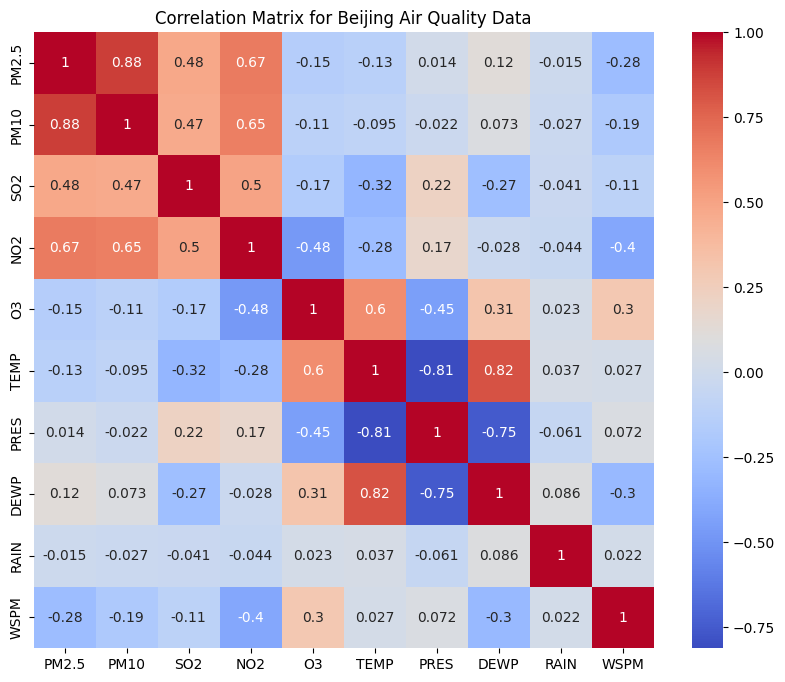

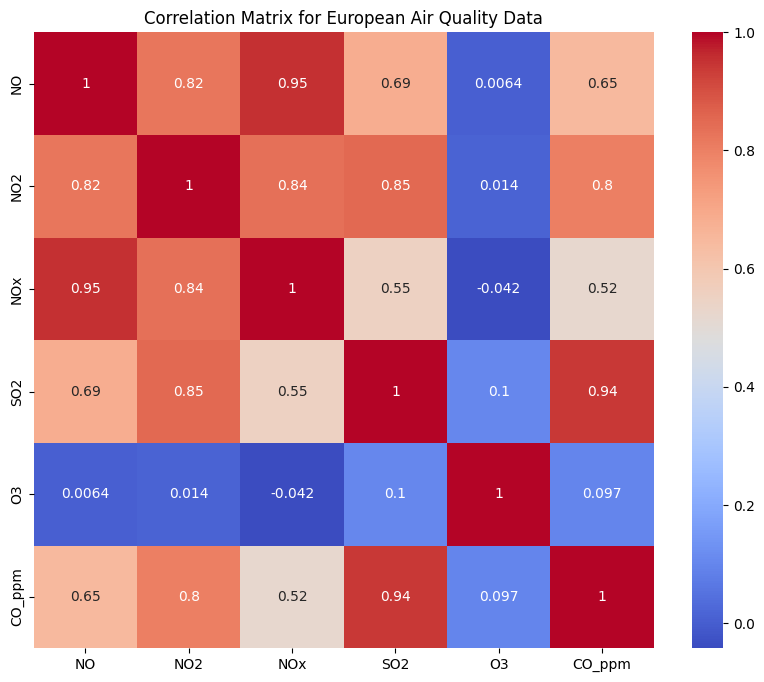

In [ ]:
# Correlation analysis for Beijing
beijing_corr = air_quality_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(beijing_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Beijing Air Quality Data')
plt.show()

# Correlation analysis for European locations
europe_corr = inorganic_gases_df[['NO', 'NO2', 'NOx', 'SO2', 'O3', 'CO_ppm']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(europe_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for European Air Quality Data')
plt.show()


### Comparative Analysis of Pollutant Levels in 2017

The following code filters the air quality datasets for Beijing and various European locations to include only data from the year 2017. It then plots comparative time series for NO2, O3, and SO2 levels between these two regions.

#### Filtering the Data for 2017

The datasets are filtered to include data from January 1, 2017, to December 31, 2017.


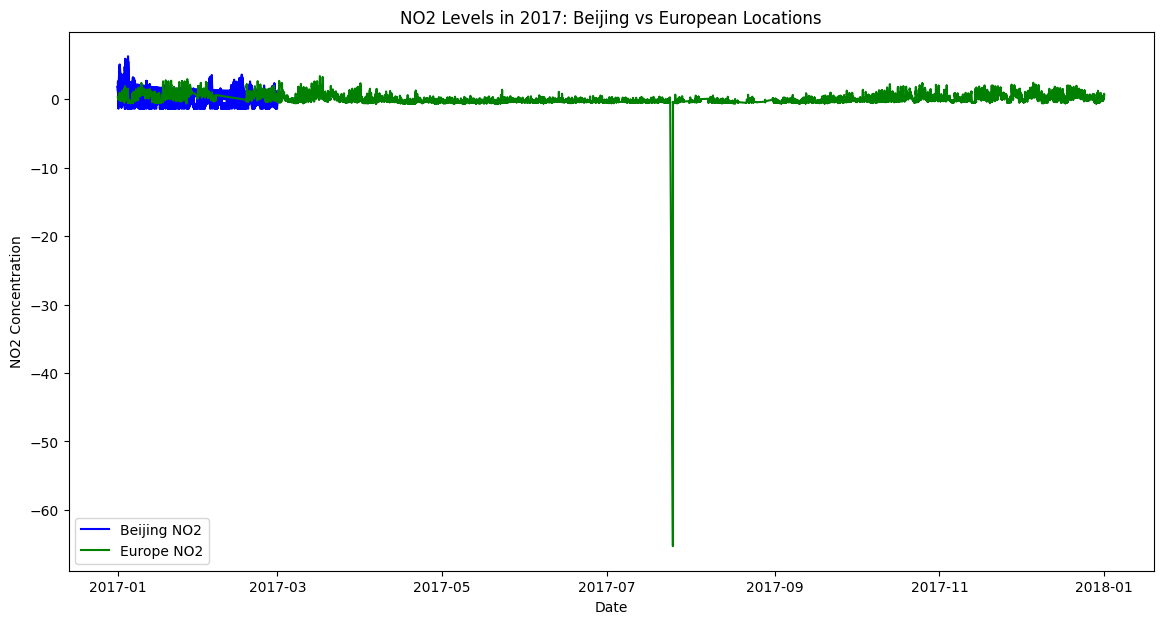

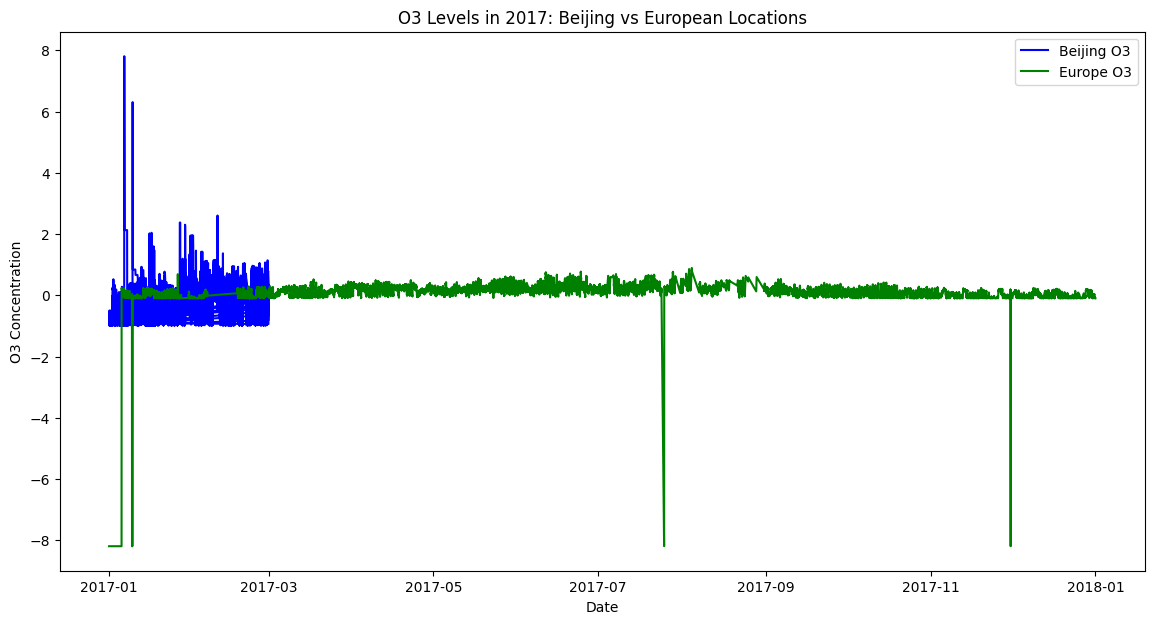

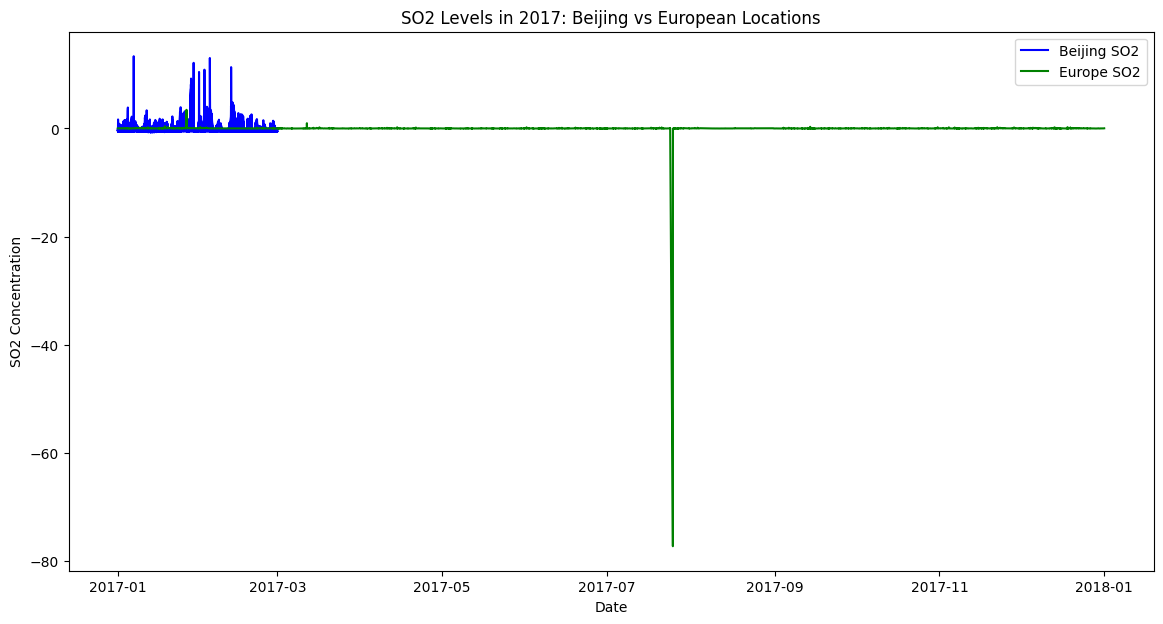

In [18]:
# Filter Beijing dataset for 2017
beijing_2017_df = air_quality_df[(air_quality_df['datetime'] >= '2017-01-01') & (air_quality_df['datetime'] < '2018-01-01')]

# Filter European dataset for 2017
european_2017_df = inorganic_gases_df[(inorganic_gases_df['DateTime'] >= '2017-01-01') & (inorganic_gases_df['DateTime'] < '2018-01-01')]

plt.figure(figsize=(14, 7))x

# Plot NO2 levels for Beijing in 2017
plt.plot(beijing_2017_df['datetime'], beijing_2017_df['NO2'], label='Beijing NO2', color='blue')

# Plot NO2 levels for European locations in 2017
plt.plot(european_2017_df['DateTime'], european_2017_df['NO2'], label='Europe NO2', color='green')

plt.title('NO2 Levels in 2017: Beijing vs European Locations')
plt.xlabel('Date')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()
# Comparative plot for O3
plt.figure(figsize=(14, 7))
plt.plot(beijing_2017_df['datetime'], beijing_2017_df['O3'], label='Beijing O3', color='blue')
plt.plot(european_2017_df['DateTime'], european_2017_df['O3'], label='Europe O3', color='green')
plt.title('O3 Levels in 2017: Beijing vs European Locations')
plt.xlabel('Date')
plt.ylabel('O3 Concentration')
plt.legend()
plt.show()
# Comparative plot for SO2
plt.figure(figsize=(14, 7))
plt.plot(beijing_2017_df['datetime'], beijing_2017_df['SO2'], label='Beijing SO2', color='blue')
plt.plot(european_2017_df['DateTime'], european_2017_df['SO2'], label='Europe SO2', color='green')
plt.title('SO2 Levels in 2017: Beijing vs European Locations')
plt.xlabel('Date')
plt.ylabel('SO2 Concentration')
plt.legend()
plt.show()

### Modeling NO2 Levels in Beijing

The following code demonstrates the process of modeling NO2 levels in Beijing using a Random Forest Regressor. The steps include preparing the data, training the model, making predictions, and evaluating the model's performance.

#### Data Preparation

We use temperature (TEMP), pressure (PRES), dew point (DEWP), rainfall (RAIN), and wind speed (WSPM) as predictor variables to model NO2 levels.


Mean Squared Error: 0.4086092641363003


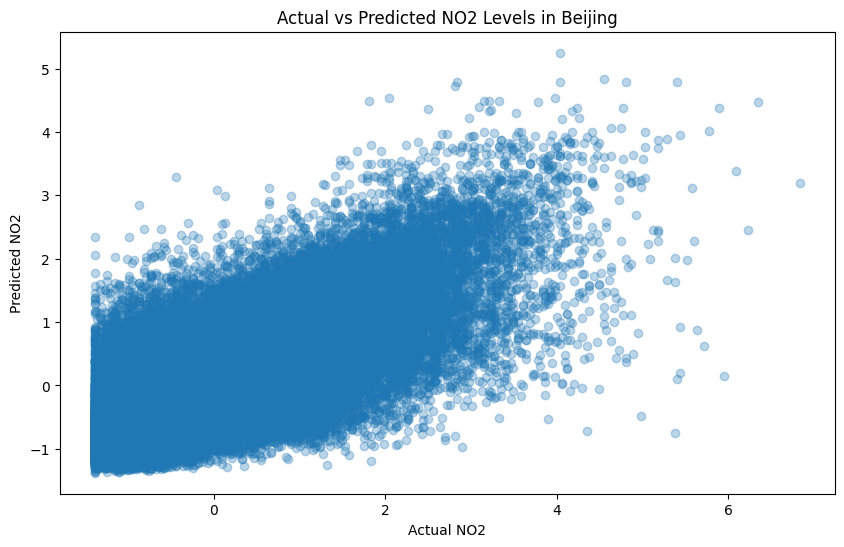

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data for modeling for Beijing dataset
X_beijing = air_quality_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]
y_beijing = air_quality_df['NO2']

X_train, X_test, y_train, y_test = train_test_split(X_beijing, y_beijing, test_size=0.3, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual NO2')
plt.ylabel('Predicted NO2')
plt.title('Actual vs Predicted NO2 Levels in Beijing')
plt.show()


### Predicting NO2 Levels in European Locations

The following code demonstrates the process of using the previously trained Random Forest Regressor model to predict NO2 levels in European locations. It includes preparing the data, making predictions, evaluating the model's performance on the new data, and visualizing the results.

#### Data Preparation

We use NO, NOx, SO2, O3, and CO_ppm as predictor variables to model NO2 levels in European locations.


Mean Squared Error on European Data: 1.114145556455921


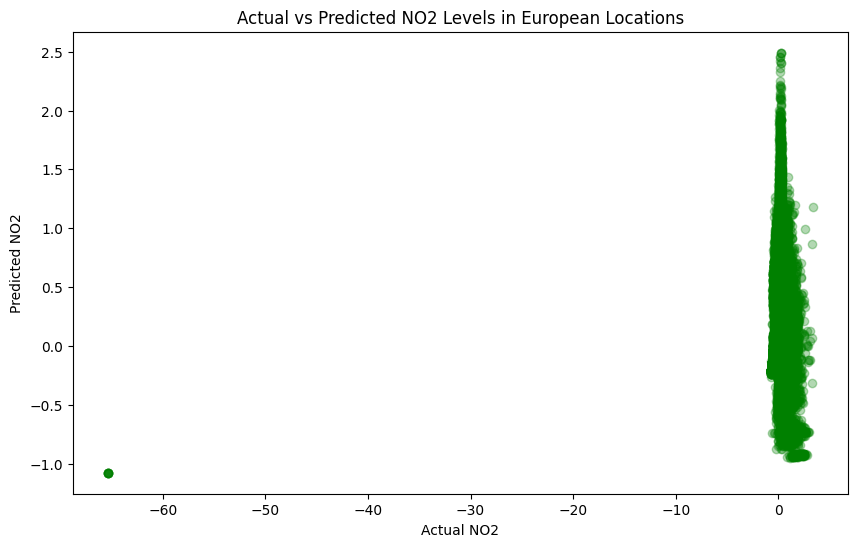

In [ ]:
# Prepare data for modeling using European dataset
X_europe = inorganic_gases_df[['NO', 'NOx', 'SO2', 'O3', 'CO_ppm']]
y_europe = inorganic_gases_df['NO2']

# Predict using the previously trained model
y_europe_pred = model.predict(X_europe)

# Evaluate the model on European data
europe_mse = mean_squared_error(y_europe, y_europe_pred)
print(f"Mean Squared Error on European Data: {europe_mse}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_europe, y_europe_pred, alpha=0.3, color='green')
plt.xlabel('Actual NO2')
plt.ylabel('Predicted NO2')
plt.title('Actual vs Predicted NO2 Levels in European Locations')
plt.show()
